In [21]:
# !pip install git+https://github.com/AI-Guru/ngdlm.git
"""
          X
    784 -------------------
        \    encoder      /
         \               /
          \-------------/ 
              output
                /\
               /  \
              /    \
          z.mean   z.var 2 demintion          latent space        
             |      |
             |      |
             \      /
              \    /
               \  /
              input
           -------------
          /  decoder    \  
         /               \
        /                 \
    784 -------------------
        prime x
   
"""
print(None)

None


In [22]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from tensorflow.keras.datasets import mnist
import numpy as np


In [23]:
(x_input_train, _), (x_input_test, y_output_test) = mnist.load_data()

# divde the unit 8( bites between btween 0 and 255) by 255 to get floats between 0 and 1 
x_input_train = x_input_train.astype('float32') / 255.0
x_input_test = x_input_test.astype('float32') / 255.0

print(x_input_train.shape, x_input_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [24]:
latent_dim = 2
# build the encoder in funcational way

encoder_input = layers.Input(shape=(28, 28))
encoder_output = layers.Reshape((28 * 28,))(encoder_input)
encoder_output = layers.Dense((28 * 28), activation='relu')(encoder_output)
encoder_output = layers.Dense(512, activation='relu')(encoder_output)
encoder = models.Model(encoder_input, encoder_output)

#encoder.summary()

In [25]:
# the latent space
decoder_input = layers.Input(shape=(latent_dim,))

decoder_output = layers.Dense(512, activation='relu')(decoder_input)
decoder_output = layers.Dense(28 * 28, activation='sigmoid')(decoder_input)
decoder_output = layers.Reshape((28, 28))(decoder_output)
decoder = models.Model(decoder_input, decoder_output)

# variation aotuencoder
vae = ngdlmodels.VAE(encoder, decoder, latent_dim=latent_dim)
#vae.summary()

vae.compile(optimizer='adam',
           loss = 'binary_crossentropy')

history = vae.fit(x_input_train, x_input_train,
                 epochs=100,
                 batch_size=512,
                 shuffle=True,
                 validation_data=(x_input_test, x_input_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.5406 - val_loss: 0.4091
Epoch 2/100
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3742 - val_loss: 0.3504
Epoch 3/100
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3367 - val_loss: 0.3259
Epoch 4/100
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3170 - val_loss: 0.3095
Epoch 5/100
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3044 - val_loss: 0.2993
Epoch 6/100
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2958 - val_loss: 0.2920
Epoch 7/100
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2895 - val_loss: 0.2864
Epoch 8/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2845 - val_loss: 0.2822
Epoch 9/100
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2

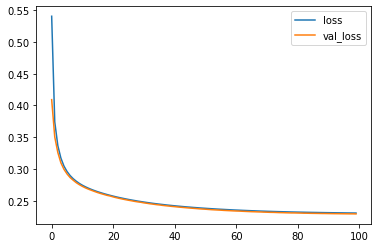

In [26]:
ngdlutils.render_history(history)

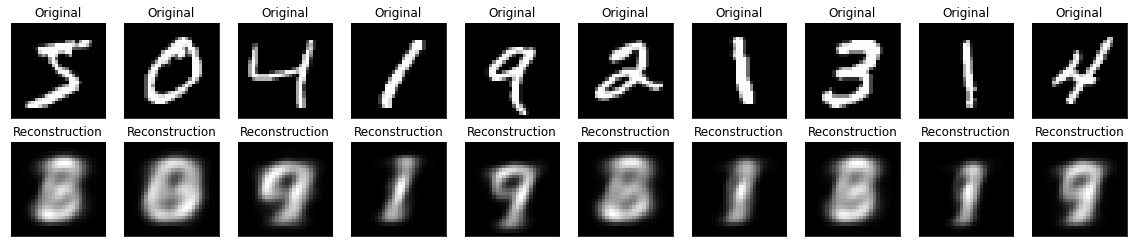

In [27]:
ngdlutils.render_image_reconstructions( vae, x_input_train[0:10])

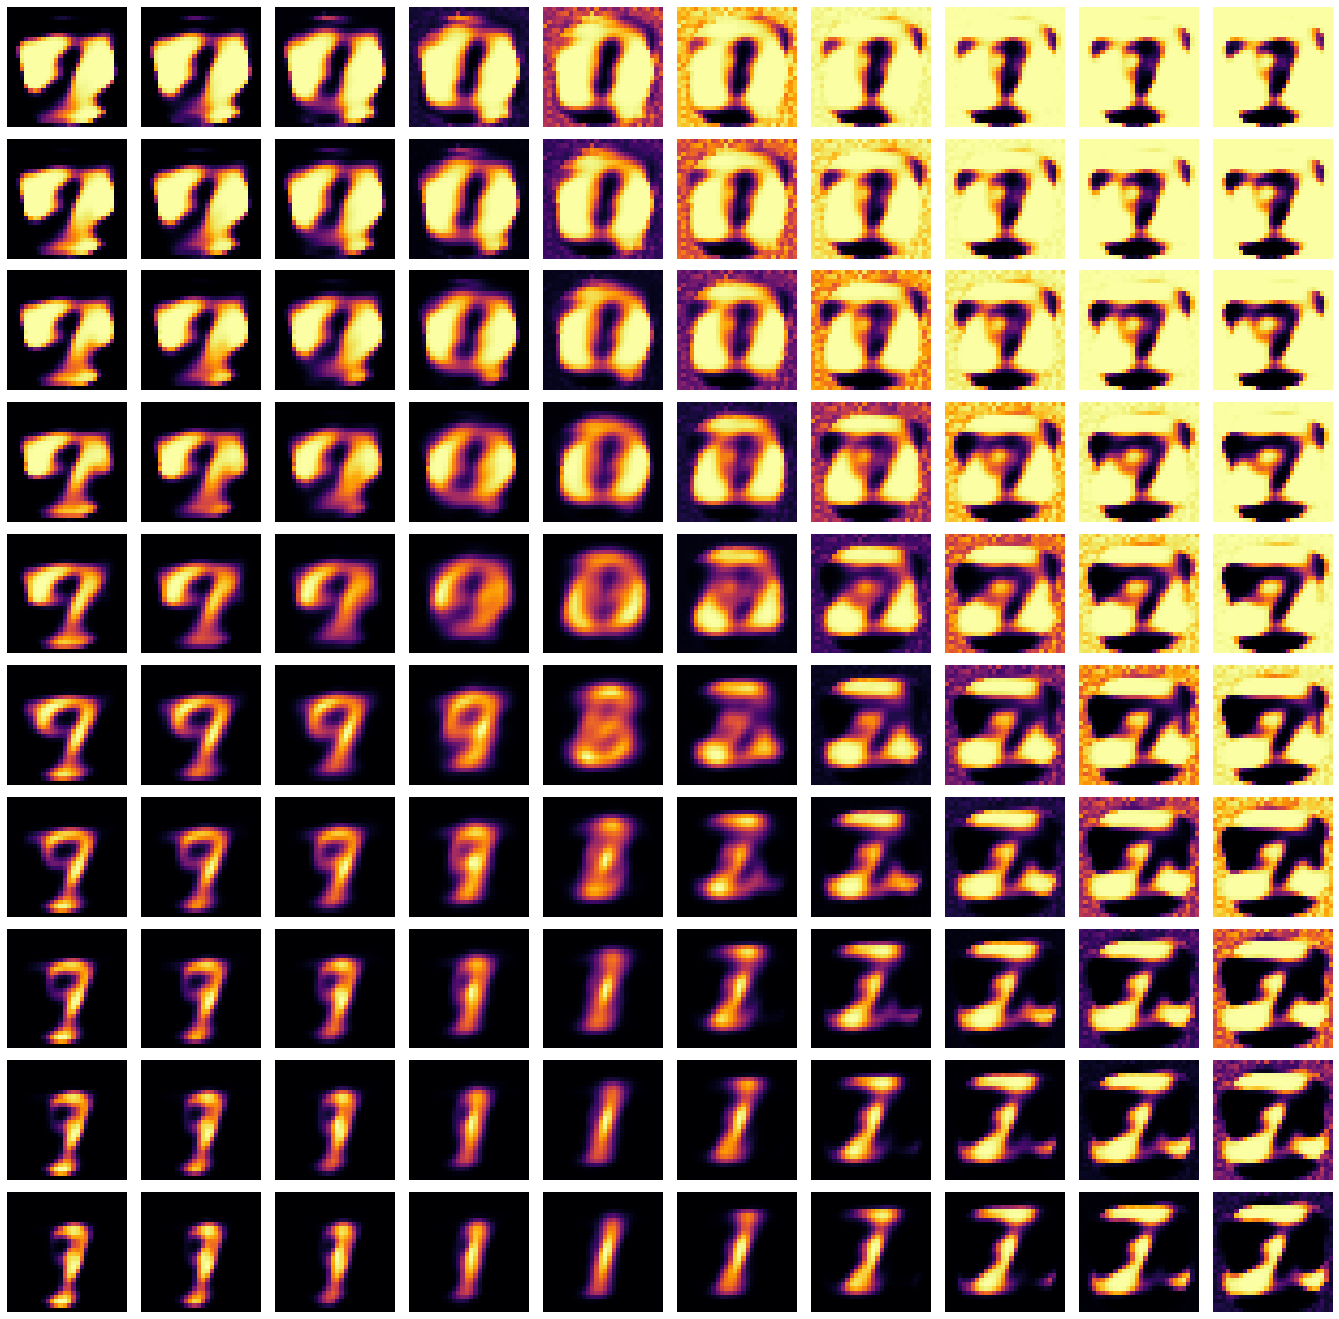

In [28]:
ngdlutils.render_image_latent_space(vae.decoder, 10, cmap='inferno')

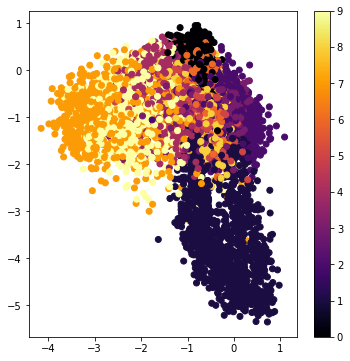

In [29]:
ngdlutils.render_encodings(vae.encoder, x_input_test, y_output_test)